# Exploratory Data Analysis (EDA)
EDA is an approach to analyse the data using visual techniques. It is used to discover trends,patterns or to check assumptions with the help of statistical summary and graphical representations.

## Steps to Data Analysis
1. Understanding the defined problem statement
2. Identify the data you want to analyse
3. Make some hypothesis for the research questions
4. Explore and clean the data
5. Analyze the data to get useful insights
6. Present the data in terms of report OR dashboards using visualisation

# Problem Statement :
## Business Problem  
In recent years, City Hotel and resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, inclusing fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotel's primary goal in order to increase their efficieny in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

## Dataset
Source : Kaggle

Time Frame : 2015 - 2017
https://www.kaggle.com/datasets/mojtaba142/hotel-booking

ASSUMPTIONS :
1. No outliers between 2015 and 2017 shall have a substancial impact on the data used.
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are currently not using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of the revenue is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

## Research Questions
1. What are the variables that affect hotel reservation cancellations?
2. How can we help handle hotel reservation cancellations problem better?
3. How will hotels be assisted in making prices and promotional decisions?

## Hypothesis
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list , customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

In [1]:
# Installing modules
!pip install matplotlib --quiet
!pip install seaborn --quiet

In [2]:
# Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('hotel_bookings 2.csv')

In [4]:
# EDA and Data Cleaning
df.head() # returns top 5 rows from the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.columns # returns the columns of the dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info() # returns the type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# We need to perform analysis on the 'reservation_status_date' , so it's important for us to convert it to 'datatime' format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
# df.describe() works on numerical columns only , so
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
# Get the columns of object data type
for col in df.describe(include = 'object').columns:
    print(col) 
    print(df[col].unique())
    print("-"* 50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [10]:
# No. of missing values in each column
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Dropping columns agent and company and dropping missing values from other columns(here,country)
df.drop(['company','agent'],axis =1,inplace = True)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
# removing outlier for 'adr' max
df = df[df['adr']<5000]

## Data Analysis and Visualisations

In [15]:
# Calculate the percentage/count of those reservations which are cancelled and not cancelled 
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

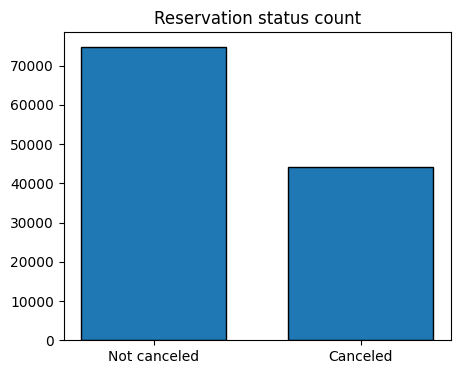

In [16]:
# Visualising the above retreived info
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

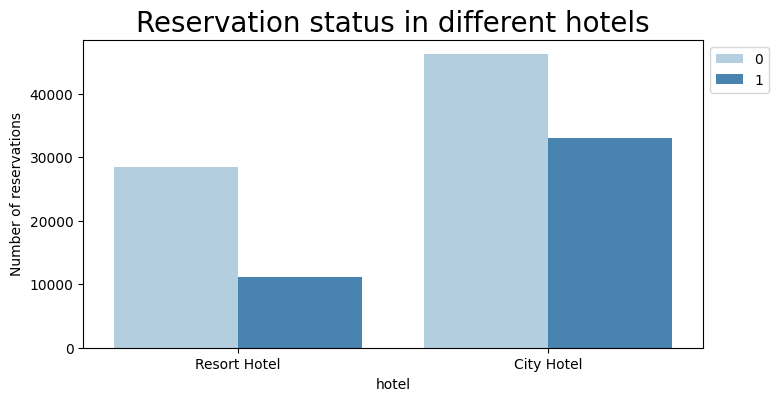

In [17]:
# Visualising the cancellation ratios of different hotels
plt.figure(figsize = (8,4))
ax1 = sns.countplot(data=df,x='hotel', hue='is_canceled', palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('Number of reservations')
plt.show()

In [18]:
# Get the percentage values for the hotels
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [19]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [20]:
# Prices of both hotels
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

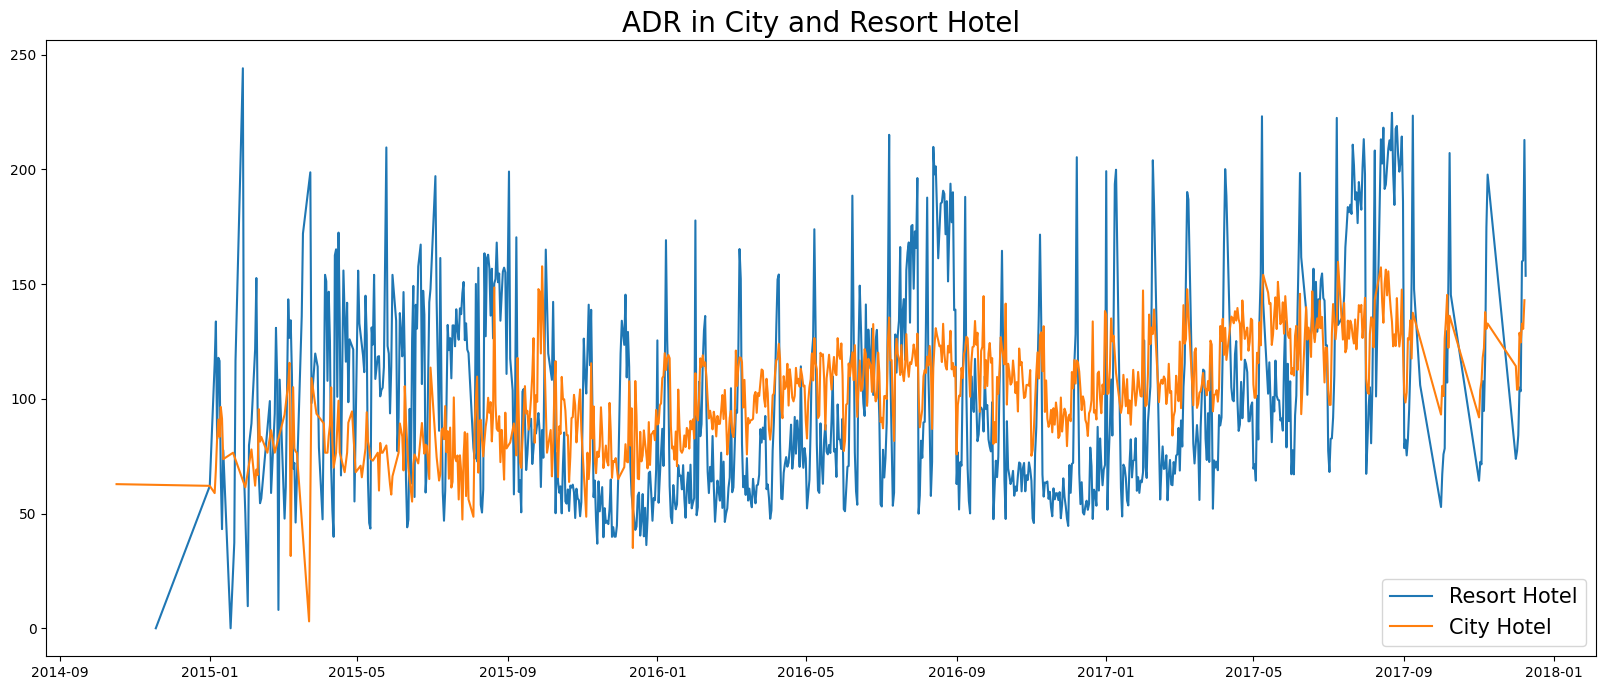

In [21]:
# Visualising the adr in both hotels to test our hypothesis
plt.figure(figsize = (20,8))
plt.title('ADR in City and Resort Hotel',fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 15)
plt.show()

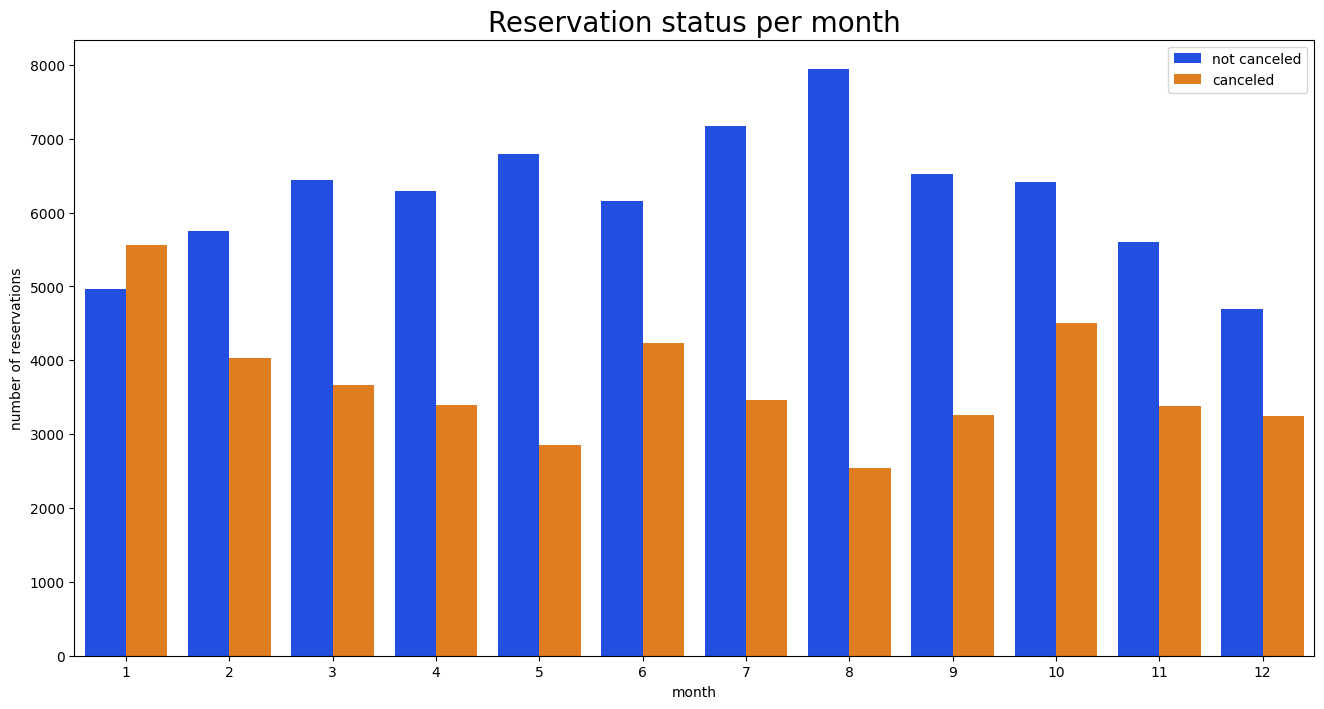

In [22]:
# Visualising the months when reservations and cancellations are high
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(data = df,x='month',hue='is_canceled',palette ='bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

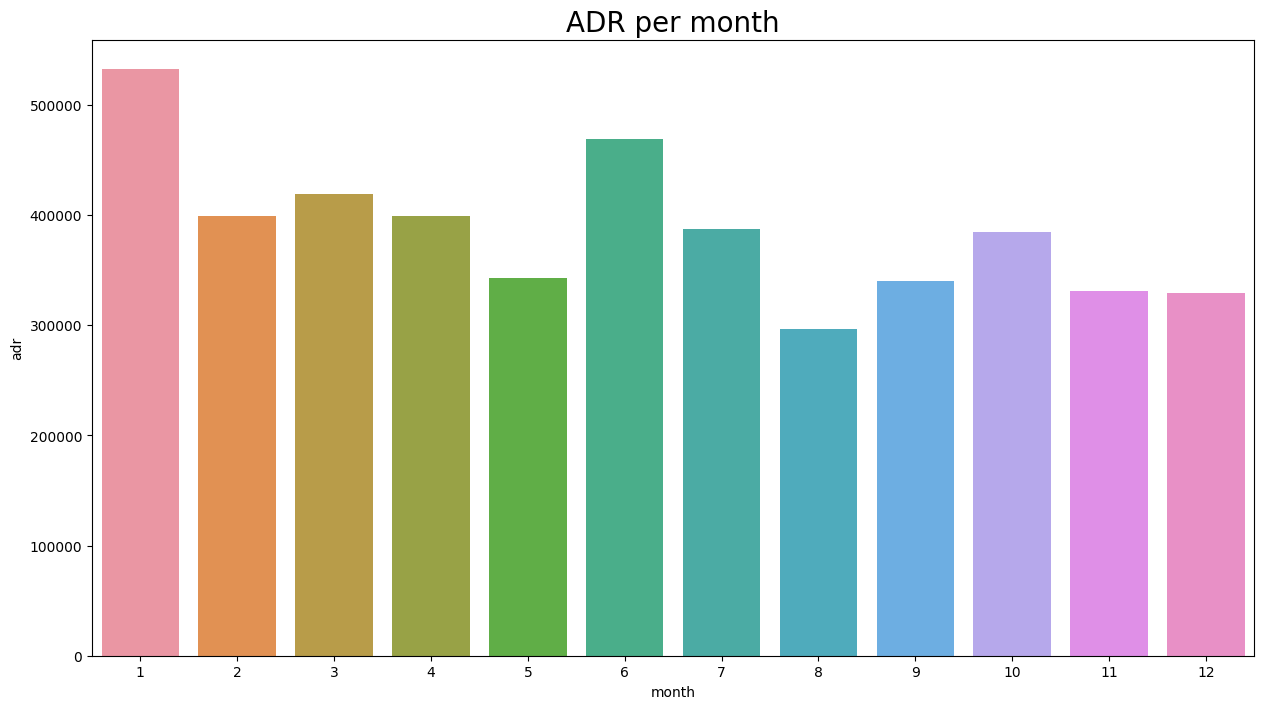

In [23]:
# ADR per month
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize =20)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

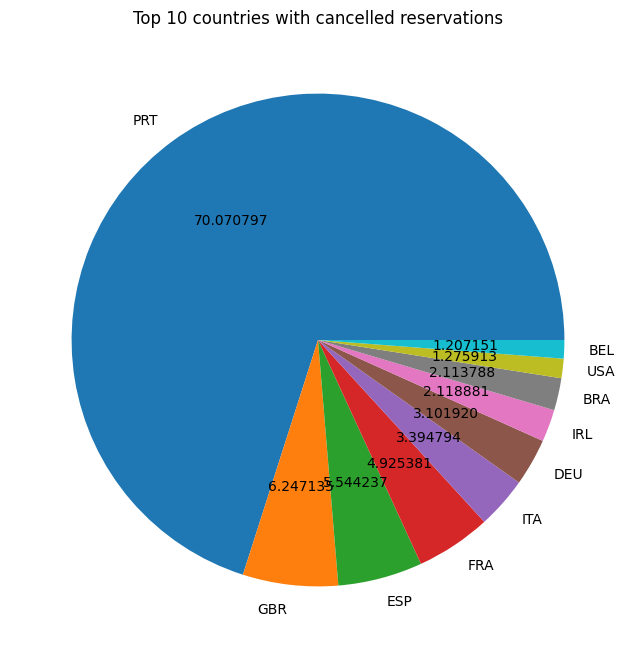

In [24]:
# Cancellations seen in top 10 countries
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with cancelled reservations')
plt.pie(top_10_country, autopct = '%2f', labels=top_10_country.index)
plt.show()

In [25]:
# Clients
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [26]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [27]:
# Cancelled reservations in the market segment
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

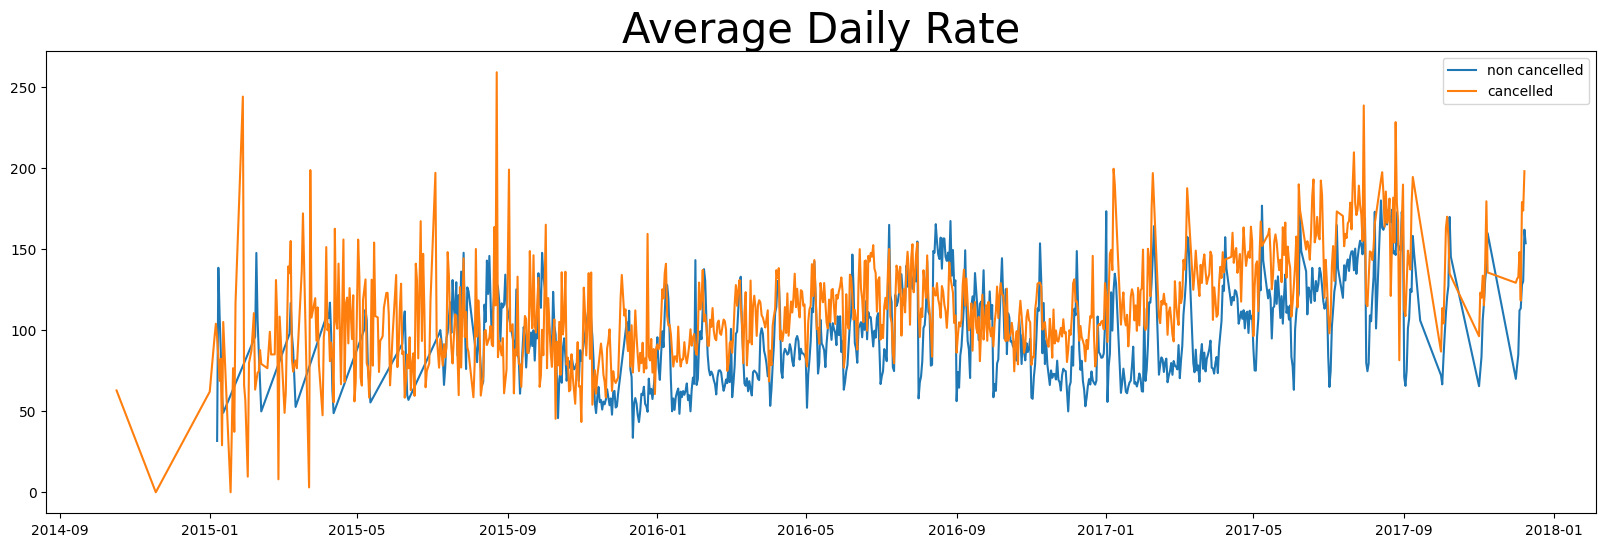

In [28]:
# ADR of cancelled reservations VS non cancelled reservations
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

non_cancelled_data = df[df['is_canceled']==0]
non_cancelled_df_adr = non_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
non_cancelled_df_adr.reset_index(inplace = True)
non_cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate',size = 30)
plt.plot(non_cancelled_df_adr['reservation_status_date'],non_cancelled_df_adr['adr'], label = 'non cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

## Story Telling with data ~
1. The first bar graph shows the percentage of reservations that are cancelled and those that are not. It is obvious that there are still a significant number that havent been cancelled. However, yet 37% of clients who have cancelled their reservations has had a significant impact over the hotels revenue 
2. The second bar graph shows that in comparison to resort hotels, city hotels have more bookings. Its possible that resort hotels are more expensive than those in cities.
3. The line graph shows that, on certain days the ADR for a city hotel is less than that of a resort hotel and on other days its even less.It goes without saying that weekends and holidays may see a spike in the hotel rates.
4. We developed a grouped bar graph to analyze the months with the highest and lowest reservation levels. As can be seen, the number of non cancelled reservations is highest in the month of August whereas January is the month with the most cancelled reservations
5. The following bar graph demonstrates that the cancellations are MOST common when prices are high and less common when prices are low. Hence, the cost of accommodation greatly affects the cancellation rates. Thus, proving our hypothesis 1.
6. The next pie chart shows the cancellation rates in the top 10 countries. It can be observed that Portugal has the highest number of cancellations.
7. We also observed that around 46% of the clients come from online travel agencies, whereas 27% comes from groups and only 4% of clients book hotels directly by visiting them. Thus,defying our hypothesis 3.
8. The last line graph clearly indicates that higher prices lead to higher cancellation.

## Suggestions to address the business problem 
1. As per our findings from the data analysis, we know that cancellation rates spike as the prices see a hike. In order to prevent cancellations of reservations, hotels could work on their pricing strategy and try to lower the rates for specific hotels based on locations.They can also provide some discounts to the customers so as to attract more customers.

2. As the ratio of cancellation and non cancellation of rooms is higher in resort hotel than in city hotels, hotels can look into providing discounts on the room prices on weeknds and holidays.

3. In the month of January, hotels can start campaigns or invest a reasonable amount on marketing to increase their revenue as the cancellation is highest in this month.

4. Quality of room services can be improved mainly in Portugal to reduce the cancellation rate.